Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_e

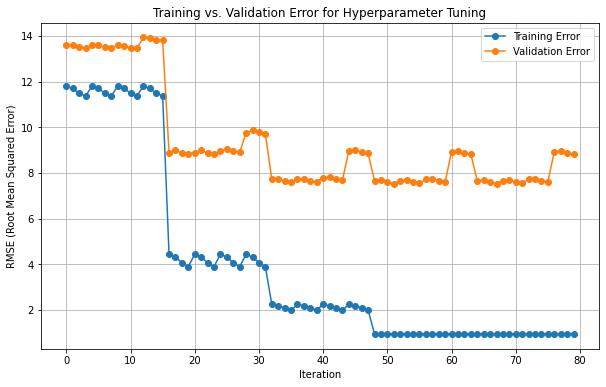

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset as previously described
import pandas as pd
file_path = '/Users/shubanranganath/Desktop/hackirvine-proj/2022_Q1_OR_Utilization.csv'
date_columns = ['Date', 'OR Schedule','Wheels In', 'Start Time','End Time','Wheels Out']
data = pd.read_csv(file_path, parse_dates=date_columns)
# Select the features (X) and target (y) columns
X = data[['CPT Description', 'CPT Code', 'Service']]
y = data['Booked Time (min)']

# Convert categorical columns to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['CPT Description', 'Service'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Cross-validate and plot training vs. test errors for each iteration
train_errors = []
test_errors = []

for params in grid_search.cv_results_['params']:
    model = RandomForestRegressor(**params, random_state=42)
    train_score = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    test_score = np.sqrt(-cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean())
    train_errors.append(train_score)
    test_errors.append(test_score)

# Plot training vs. test errors for each iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label='Training Error', marker='o')
plt.plot(range(len(test_errors)), test_errors, label='Validation Error', marker='o')
plt.xlabel('Iteration')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('Training vs. Validation Error for Hyperparameter Tuning')
plt.legend()
plt.grid(True)
plt.show()